<h2><center> Classification Mnist -Deep Neuron AI </center></h2>

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader as DataLoader
import torch.nn as nn
import torch.optim as opt
from torch.autograd import Variable

In [2]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=False)

In [3]:
train_dataset.data.shape # 60000 count, 28x28

torch.Size([60000, 28, 28])

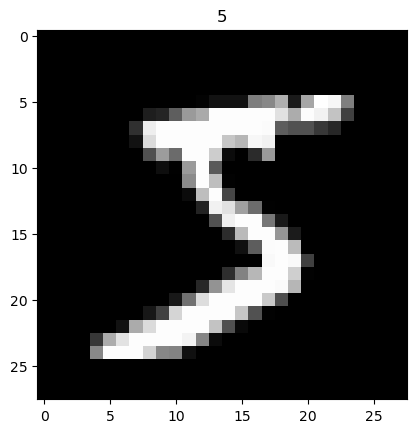

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_dataset.data[0], cmap='gray') # first image
plt.title('%i' %train_dataset.targets[0])
plt.show()

In [5]:
batch_size = 100
input_size = 28 * 28
num_class = 10 #label: 0-9
hidden_size = 500 # 500 nodes
num_epoch = 5
learning_rate = 0.001

In [6]:
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True)
test_loader = DataLoader(dataset=test_dataset,
                          batch_size=batch_size,
                          shuffle=False)

In [7]:
test_y = test_dataset.targets
test_y.shape # 10000 count

torch.Size([10000])

In [8]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_class):
        super(Model, self).__init__()
        self.fc_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc_2 = nn.Linear(hidden_size, num_class)
        
    def forward(self, x):
        out = self.fc_1(x)
        out = self.relu(out)
        out = self.fc_2(out)
        return out

In [9]:
model = Model(input_size=input_size, hidden_size=hidden_size, num_class=num_class)
print(model)

Model(
  (fc_1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc_2): Linear(in_features=500, out_features=10, bias=True)
)


In [10]:
loss_func = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=learning_rate)

In [11]:
# train model
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # images are 100(batch_size) * 28*28 tensor.
        images = Variable(images.view(-1, 28*28)) # -1 means 100 here
        labels = Variable(labels)
        
        optimizer.zero_grad()
        output = model(images) # forward pass
        loss = loss_func(output, labels) # loss
        
        # backward
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch+1, i+1, loss.data))

Epoch: 1, Batch: 100, Loss: 0.3641415536403656
Epoch: 1, Batch: 200, Loss: 0.22211231291294098
Epoch: 1, Batch: 300, Loss: 0.17881488800048828
Epoch: 1, Batch: 400, Loss: 0.18573039770126343
Epoch: 1, Batch: 500, Loss: 0.16242703795433044
Epoch: 1, Batch: 600, Loss: 0.1902265101671219
Epoch: 2, Batch: 100, Loss: 0.16107341647148132
Epoch: 2, Batch: 200, Loss: 0.21833530068397522
Epoch: 2, Batch: 300, Loss: 0.1533384472131729
Epoch: 2, Batch: 400, Loss: 0.15025600790977478
Epoch: 2, Batch: 500, Loss: 0.06744755804538727
Epoch: 2, Batch: 600, Loss: 0.050049327313899994
Epoch: 3, Batch: 100, Loss: 0.08742379397153854
Epoch: 3, Batch: 200, Loss: 0.04230950400233269
Epoch: 3, Batch: 300, Loss: 0.09424186497926712
Epoch: 3, Batch: 400, Loss: 0.028483765199780464
Epoch: 3, Batch: 500, Loss: 0.09658776968717575
Epoch: 3, Batch: 600, Loss: 0.02376888506114483
Epoch: 4, Batch: 100, Loss: 0.02480161190032959
Epoch: 4, Batch: 200, Loss: 0.09596456587314606
Epoch: 4, Batch: 300, Loss: 0.03425858914

In [12]:
# calculate accuracy

correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    
    # output is 100x10 matrix;
    output = model(images)
    
    # 1 means max by column;
    # _ is -> value; predicted -> label(index).
    _, predicted = torch.max(output.data, 1) 
    
    total += labels.size(0) # len; total is 100  here.
    correct += (predicted == labels).sum()
    
print('accuracy: {} %'.format(float(correct)/ float(total) * 100))

accuracy: 97.68 %


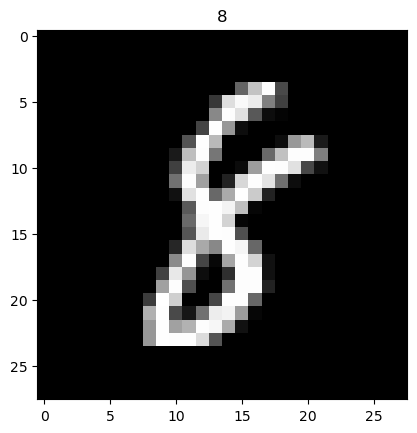

In [13]:
plt.imshow(images.data[0].view(28, 28), cmap='gray')
plt.title(int(labels[0]))
plt.show()

In [14]:
#1 method save model weight
torch.save(model.state_dict(), 'model.pkl')
model = Model(input_size, hidden_size, num_class)
# load weight
model.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

In [15]:
#2 method save model
torch.save(model, 'model2.pkl')
model3 = torch.load('model2.pkl')

### Other way building model

In [16]:
model_easyway = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_class)
)
print(model_easyway)

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)


In [17]:
loss_func = nn.CrossEntropyLoss()
optimizer = opt.Adam(model_easyway.parameters(), lr=learning_rate)

# train model
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):
        # images are 100(batch_size) * 28*28 tensor.
        images = Variable(images.view(-1, 28*28)) # -1 means 100 here
        labels = Variable(labels)
        
        optimizer.zero_grad()
        output = model_easyway(images) # forward pass
        loss = loss_func(output, labels) # loss
        
        # backward
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch: {}, Batch: {}, Loss: {}'.format(epoch+1, i+1, loss.data))

Epoch: 1, Batch: 100, Loss: 0.30346259474754333
Epoch: 1, Batch: 200, Loss: 0.22173240780830383
Epoch: 1, Batch: 300, Loss: 0.19771111011505127
Epoch: 1, Batch: 400, Loss: 0.29929691553115845
Epoch: 1, Batch: 500, Loss: 0.15386822819709778
Epoch: 1, Batch: 600, Loss: 0.16780200600624084
Epoch: 2, Batch: 100, Loss: 0.28921014070510864
Epoch: 2, Batch: 200, Loss: 0.08196040987968445
Epoch: 2, Batch: 300, Loss: 0.20036765933036804
Epoch: 2, Batch: 400, Loss: 0.10264822840690613
Epoch: 2, Batch: 500, Loss: 0.1423172503709793
Epoch: 2, Batch: 600, Loss: 0.10015389323234558
Epoch: 3, Batch: 100, Loss: 0.06903389096260071
Epoch: 3, Batch: 200, Loss: 0.09284999221563339
Epoch: 3, Batch: 300, Loss: 0.10099270939826965
Epoch: 3, Batch: 400, Loss: 0.10086120665073395
Epoch: 3, Batch: 500, Loss: 0.022567985579371452
Epoch: 3, Batch: 600, Loss: 0.03579895570874214
Epoch: 4, Batch: 100, Loss: 0.06556075811386108
Epoch: 4, Batch: 200, Loss: 0.06551477313041687
Epoch: 4, Batch: 300, Loss: 0.0427637398

In [18]:
# calculate accuracy

correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)
    
    # output is 100x10 matrix;
    output = model_easyway(images)
    
    # 1 means max by column;
    # _ is -> value; predicted -> label(index).
    _, predicted = torch.max(output.data, 1) 
    
    total += labels.size(0) # len; total is 100  here.
    correct += (predicted == labels).sum()
    
print('accuracy: {} %'.format(float(correct)/ float(total) * 100))

accuracy: 97.67 %
